In [2]:
from matplotlib.animation import FuncAnimation


<ipython-input-6-723dffe88523>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  electron.set_data(x, y)


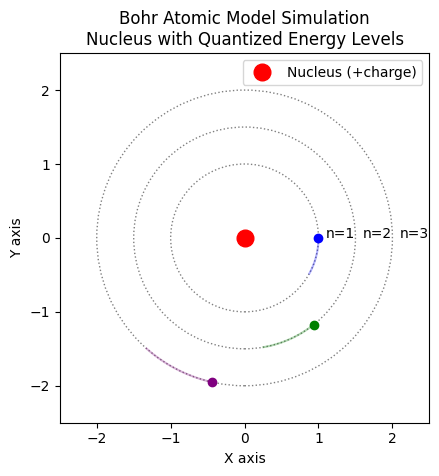

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define parameters for the Bohr model
num_levels = 3  # Number of energy levels (quantized orbits)
orbit_radii = [1.0, 1.5, 2.0]  # Radii for each energy level
electron_speeds = [0.07, 0.05, 0.03]  # Angular speed for each energy level
colors = ['blue', 'green', 'purple']  # Colors for each electron to differentiate them

# Initialize the figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_title("Bohr Atomic Model Simulation\nNucleus with Quantized Energy Levels")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

# Plot the nucleus at the center
nucleus, = ax.plot(0, 0, 'o', color='red', markersize=12, label="Nucleus (+charge)")

# Draw quantized orbits for each energy level
for radius, level in zip(orbit_radii, range(1, num_levels + 1)):
    orbit_circle = plt.Circle((0, 0), radius, color='gray', linestyle='dotted', fill=False)
    ax.add_patch(orbit_circle)
    ax.text(radius + 0.1, 0, f"n={level}", color="black")  # Label each energy level

# Initialize electron positions in each orbit
electron_plots = [ax.plot([], [], 'o', color=colors[i])[0] for i in range(num_levels)]
electron_trails = [ax.plot([], [], '-', color=colors[i], alpha=0.3)[0] for i in range(num_levels)]

# Labels and legend
plt.legend(loc="upper right")

# Function to initialize animation
def init():
    for electron, trail in zip(electron_plots, electron_trails):
        electron.set_data([], [])
        trail.set_data([], [])
    return electron_plots + electron_trails

# Function to update each frame in animation
def update(frame):
    for i, (electron, trail) in enumerate(zip(electron_plots, electron_trails)):
        # Calculate the new position of each electron in circular orbit
        angle = frame * electron_speeds[i]
        x = orbit_radii[i] * np.cos(angle)
        y = orbit_radii[i] * np.sin(angle)

        # Update electron position
        electron.set_data(x, y)

        # Update electron trail
        x_trail = orbit_radii[i] * np.cos(np.linspace(angle - 0.5, angle, 20))
        y_trail = orbit_radii[i] * np.sin(np.linspace(angle - 0.5, angle, 20))
        trail.set_data(x_trail, y_trail)

    return electron_plots + electron_trails

# Create the animation
ani = FuncAnimation(fig, update, frames=360, init_func=init, blit=True, interval=50)

# Save animation as video file or display
ani.save("bohr_atomic_model.mp4", writer="ffmpeg", dpi=150)
plt.show()
